In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

#prevent notebook to hide columns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**There are missing values in waterfront, view, yr_renovated.**

In [4]:
#convert date
df['date'] = pd.to_datetime(df['date'])
df['date'].max(), df['date'].min()

(Timestamp('2015-05-27 00:00:00'), Timestamp('2014-05-02 00:00:00'))

Assumption: since the data is one year old, we ignore house appreciation in price.

In [5]:
#create year column
df['year_sold'] = pd.DatetimeIndex(df['date']).year

In [6]:
df.drop('date', axis=1, inplace=True)

# Deal with missing data and data type

Assumption: we assume that missing data in renovated year means the house has been renovated. we also assume that missing data in waterfront means that the house doesn't have  waterfront view

In [7]:
df['yr_renovated'].fillna(value=0.0, inplace=True)
df['waterfront'].fillna(value=0.0, inplace=True)

There are 63 houses missing 'view' values. 

One of them has a waterfront. So, we replace NaN of this one with 4.0 which is 

In [8]:
view_missing = df[df['view'].isna()].sort_values('price', ascending=False)

In [9]:
view_missing[view_missing['waterfront'] ==1]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
1313,7558700030,5300000.0,6,6.0,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.21,4320,24619,2015


The avg view rating of houses having waterfront is 4.  
The avg view rating of houses not having waterfront is 0.

In [10]:
round(df[df['waterfront']==1]['view'].mean())

4.0

In [11]:
round(df[df['waterfront']==0]['view'].mean())

0.0

We assign 4.0 to one that has waterfront, 0.0 for the others.

In [12]:
df.loc[df['id'] == 7558700030, 'view'] = 4.0

In [13]:
df['view'].fillna(value=0.0, inplace=True)

check out sqft_basement data type

In [14]:
df['sqft_basement'].value_counts().index

Index(['0.0', '?', '600.0', '500.0', '700.0', '800.0', '400.0', '1000.0',
       '300.0', '900.0',
       ...
       '1920.0', '2390.0', '2570.0', '1852.0', '652.0', '602.0', '1281.0',
       '1008.0', '516.0', '225.0'],
      dtype='object', length=304)

In [15]:
df['sqft_basement'].replace('?', '0.0',inplace=True)

In [16]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
602.0         1
1281.0        1
1008.0        1
516.0         1
225.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: int(x[:-2]))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Change price to integer (house price is too high to concern a penny level)

In [19]:
df.price = df.price.astype(np.int64)

# Create New Columns

We want to add 2 columns:  
house_age is the age of the house.
reno is a dummy variable--1 represents that the house has been renovated; 0 represents hasn't.  

In [20]:
df['house_age'] = df['year_sold'] - df['yr_built']

In [21]:
df['reno'] = np.where(df['yr_renovated'] != 0, 1, 0)

In [22]:
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [23]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0


# Potential Outliers 

We will drop some outliers in our data

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'cente

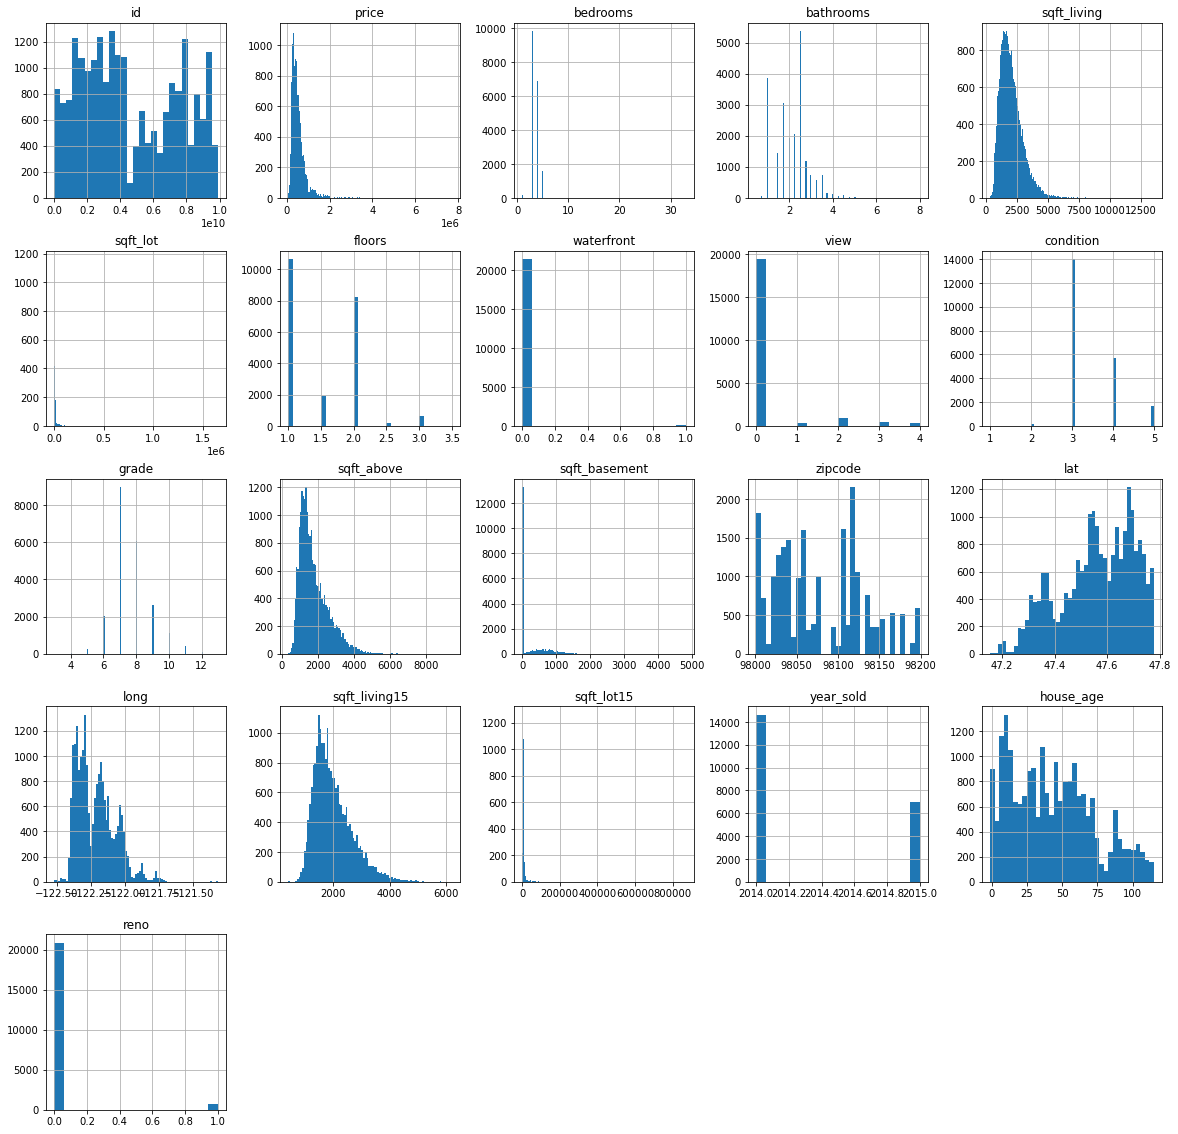

In [24]:
df.hist(figsize=(20,20), bins='auto')

**Price**

C:\Users\ramil\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'House Price')

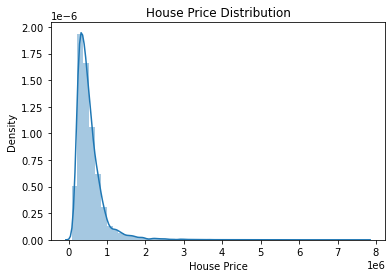

In [25]:
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.distplot(df['price'])

ax.set_title("House Price Distribution")
ax.set_xlabel('House Price')

There are some super long tail after 4m in price. We drop houses that are 4 and above.

In [26]:
print(len(df[df.price>4000000]))
df[df.price>4000000]


11


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
1162,1247600105,5110000,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020,98033,47.6767,-122.211,3430,26788,2014,15,0
1313,7558700030,5300000,6,6.00,7390,24829,2.0,1.0,4.0,4,12,5000,2390,98040,47.5631,-122.210,4320,24619,2015,24,0
1446,8907500070,5350000,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280,98004,47.6232,-122.220,4600,21750,2015,6,0
2624,7738500731,4500000,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290,98155,47.7493,-122.280,3030,23408,2014,10,0
3910,9808700762,7060000,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360,98004,47.6500,-122.214,3930,25449,2014,74,1
4407,2470100110,5570000,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000,98039,47.6289,-122.233,3560,24345,2014,13,0
7245,6762700020,7700000,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480,98102,47.6298,-122.323,3940,8800,2014,104,1
8085,1924059029,4670000,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820,98040,47.5570,-122.210,3270,10454,2014,31,1
8629,3835500195,4490000,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,0,98004,47.6208,-122.219,3720,14592,2014,13,0
9245,9208900037,6890000,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030,98039,47.6305,-122.240,4540,42730,2014,13,0


In [27]:
df = df[df.price <= 4000000]

In [28]:
df.shape

(21586, 21)

**Bedrooms**

In [29]:
df.bedrooms.value_counts()

3     9824
4     6881
2     2760
5     1594
6      269
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We drop ones that are higher than 10.

In [30]:
df[df.bedrooms >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
8748,1773100755,520000,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600,98106,47.5560,-122.363,1420,4960,2014,96,1
13301,627300145,1150000,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090,98004,47.5861,-122.113,2730,10400,2014,6,0
15147,5566100170,650000,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600,98006,47.5705,-122.175,2040,11914,2014,56,0
15856,2402100895,640000,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580,98103,47.6878,-122.331,1330,4700,2014,67,0
19239,8812401450,660000,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060,98105,47.6635,-122.320,1810,3745,2014,101,0


In [31]:
df = df[df.bedrooms < 10]

In [32]:
df.shape

(21581, 21)

**Bathrooms**

In [33]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
5.50       9
1.25       9
6.00       4
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64

In [34]:
df[df.bathrooms > 6]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
4020,9175600025,800000,7,6.75,7480,41664,2.0,0.0,2.0,3,11,5080,2400,98166,47.4643,-122.368,2810,33190,2014,61,0
8537,424049043,450000,9,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0,98144,47.5923,-122.301,1448,3866,2014,18,0
12764,1225069038,2280000,7,8.00,13540,307752,3.0,0.0,4.0,3,12,9410,4130,98053,47.6675,-121.986,4850,217800,2014,15,0
14542,2303900035,2890000,5,6.25,8670,64033,2.0,0.0,4.0,3,13,6120,2550,98177,47.7295,-122.372,4140,81021,2014,49,0
18288,6072800246,3300000,5,6.25,8020,21738,2.0,0.0,0.0,3,11,8020,0,98006,47.5675,-122.189,4160,18969,2014,13,0
20562,424069279,1180000,6,6.50,6260,10955,2.0,0.0,0.0,3,11,4840,1420,98075,47.5947,-122.039,2710,12550,2015,8,0
21490,2524069097,2240000,5,6.50,7270,130017,2.0,0.0,0.0,3,12,6420,850,98027,47.5371,-121.982,1800,44890,2014,4,0


We drop ones that are higher than 6.

In [35]:
df = df[df.bathrooms <= 6]

In [36]:
df.shape

(21574, 21)

**Sqft Living** 

Many of sqft living outliers have been removed with price outliers.

In [37]:
df[df.sqft_living > 10000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno


**Sqft Lot** 

In [38]:
df.sqft_lot.value_counts()

5000      358
6000      289
4000      251
7200      220
4800      119
         ... 
11148       1
27540       1
35736       1
1448        1
315374      1
Name: sqft_lot, Length: 9761, dtype: int64

In [39]:
df[df.sqft_lot > 700000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
1717,1020069017,700000,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0,98022,47.2313,-122.023,2560,425581,2015,95,0
3945,722069232,998000,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0,98058,47.4140,-122.087,2290,37141,2014,22,0
4437,3626079040,790000,2,3.00,2560,982278,1.0,0.0,0.0,3,8,2560,0,98014,47.6955,-121.861,1620,40946,2014,10,0
4536,2522029039,550000,3,2.00,3650,843309,2.0,0.0,0.0,4,7,3650,0,98070,47.3627,-122.496,1870,273992,2014,23,0
6685,2624089007,2000000,2,2.50,3900,920423,2.0,0.0,0.0,3,12,3900,0,98065,47.5371,-121.756,2720,411962,2015,6,0
7070,2724079090,1650000,4,3.25,3920,881654,3.0,0.0,3.0,3,11,3920,0,98024,47.5385,-121.896,2970,112384,2015,13,0
7640,2623069031,542500,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000,98027,47.4564,-122.004,2450,68825,2014,83,0
7762,2323089009,855000,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0,98045,47.4619,-121.744,1830,11700,2015,9,0
9705,225079036,937500,4,4.00,5545,871200,2.0,0.0,0.0,3,11,3605,1940,98014,47.6760,-121.882,3420,871200,2015,12,0
12993,619079096,750000,3,2.50,2350,715690,1.5,0.0,0.0,4,9,2350,0,98022,47.1622,-121.971,1280,325393,2015,36,0


In [40]:
df = df[df.sqft_lot <= 700000]

**Sqft above** 

In [41]:
df[df.sqft_above > 6500]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
11093,4054530260,1820000,4,4.50,6640,53330,2.0,0.0,0.0,3,12,6640,0,98077,47.7283,-122.046,4620,68625,2014,21,0
11859,8835800350,1950000,4,3.25,7420,167869,2.0,0.0,3.0,3,12,7420,0,98045,47.4548,-121.764,5610,169549,2015,13,0
13398,2426039123,2420000,5,4.75,7880,24250,2.0,0.0,2.0,3,13,7880,0,98177,47.7334,-122.362,2740,10761,2015,19,0
16759,1630700380,1920000,5,5.75,7730,230868,2.0,0.0,0.0,3,12,6660,1070,98077,47.7615,-122.084,2660,39292,2015,11,0
18579,3023069166,1140000,5,4.00,7320,217800,2.0,0.0,0.0,3,11,7320,0,98058,47.4473,-122.086,3270,34500,2014,22,0
19842,2524069078,2700000,4,4.00,7850,89651,2.0,0.0,0.0,3,12,7850,0,98027,47.5406,-121.982,6210,95832,2015,9,0


In [42]:
df = df[df.sqft_above <= 6500]

**Sqft basement** 

In [43]:
df[df.sqft_basement > 3000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
10074,7767000060,1900000,5,4.25,6510,16471,2.0,0.0,3.0,4,11,3250,3260,98040,47.5758,-122.242,4480,16471,2014,34,0
15468,624069108,3200000,4,3.25,7000,28206,1.0,1.0,4.0,4,12,3500,3500,98075,47.5928,-122.086,4913,14663,2014,23,0


In [44]:
df = df[df.sqft_basement <= 3000]

**Sqft lot15** 

In [45]:
df[df.sqft_lot15 > 400000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
3797,1550000463,637000,4,3.50,3080,118918,2.0,0.0,0.0,3,9,3080,0,98019,47.7721,-121.924,1830,434728,2014,6,0
8655,3226079059,549950,3,1.75,2930,266587,2.0,0.0,0.0,3,8,2440,0,98014,47.6991,-121.947,2700,438213,2014,19,0
13451,3420069060,790000,3,2.50,2640,432036,1.5,0.0,3.0,3,10,2640,0,98022,47.1795,-122.036,1500,560617,2014,18,0
19141,1020069042,858000,4,3.50,4370,422967,1.0,0.0,2.0,4,10,2580,1790,98022,47.2332,-122.029,3260,422967,2014,36,0


In [46]:
df = df[df.sqft_lot15 <= 400000]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21550 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21550 non-null  int64  
 1   price          21550 non-null  int64  
 2   bedrooms       21550 non-null  int64  
 3   bathrooms      21550 non-null  float64
 4   sqft_living    21550 non-null  int64  
 5   sqft_lot       21550 non-null  int64  
 6   floors         21550 non-null  float64
 7   waterfront     21550 non-null  float64
 8   view           21550 non-null  float64
 9   condition      21550 non-null  int64  
 10  grade          21550 non-null  int64  
 11  sqft_above     21550 non-null  int64  
 12  sqft_basement  21550 non-null  int64  
 13  zipcode        21550 non-null  int64  
 14  lat            21550 non-null  float64
 15  long           21550 non-null  float64
 16  sqft_living15  21550 non-null  int64  
 17  sqft_lot15     21550 non-null  int64  
 18  year_s

**See result from dropping outliers**

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'cente

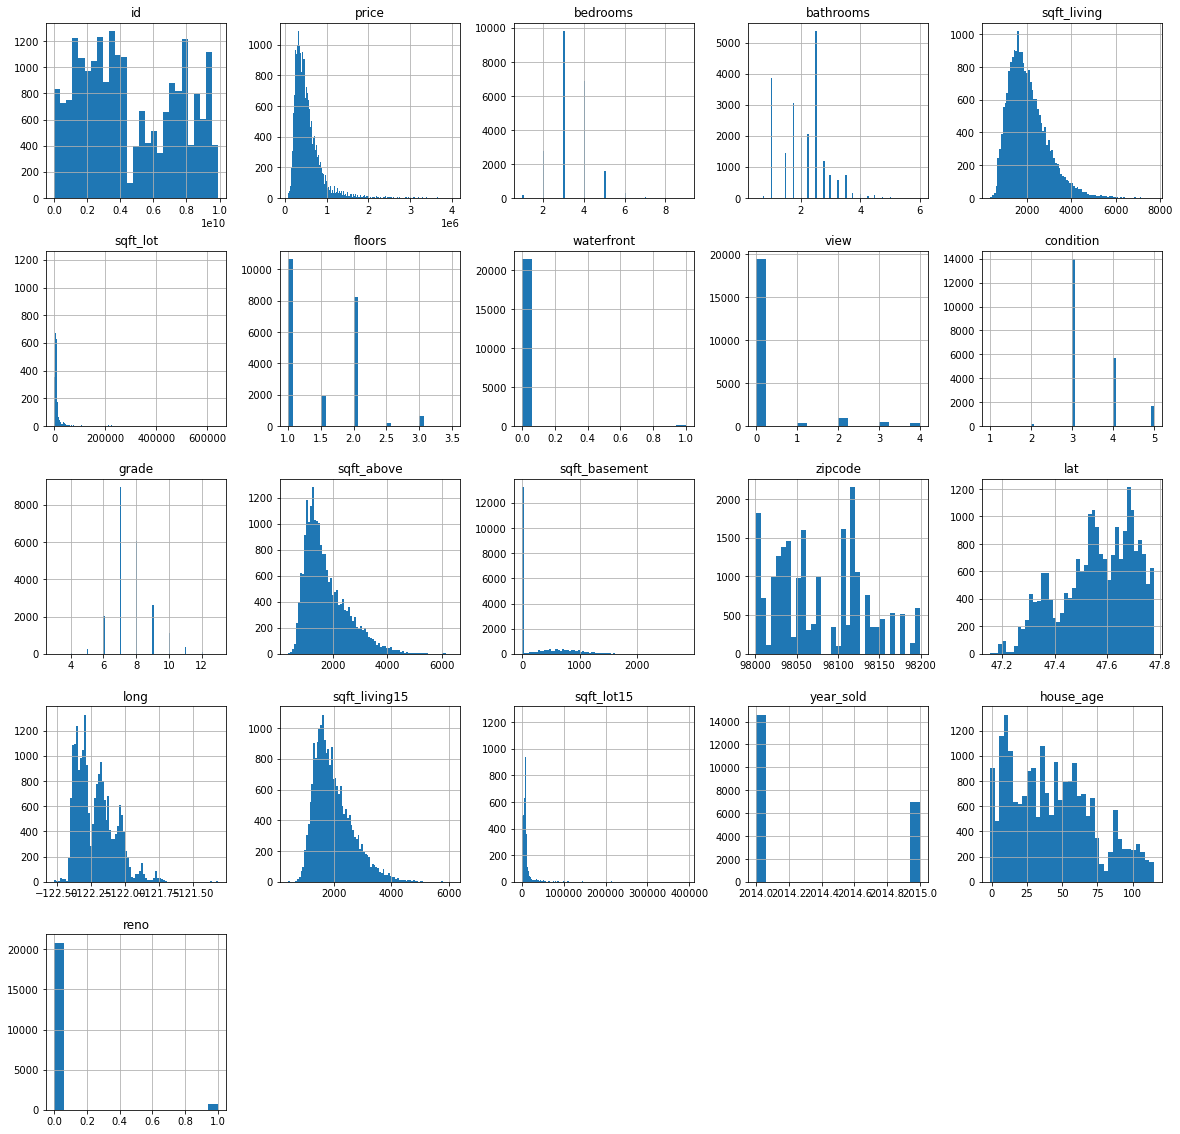

In [48]:
df.hist(figsize=(20,20), bins='auto')

LOOK BETTER!!

# Building a Model

In [51]:
df
y = df['price']
X = df.drop('price', axis=1)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16162 entries, 20696 to 4050
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16162 non-null  int64  
 1   bedrooms       16162 non-null  int64  
 2   bathrooms      16162 non-null  float64
 3   sqft_living    16162 non-null  int64  
 4   sqft_lot       16162 non-null  int64  
 5   floors         16162 non-null  float64
 6   waterfront     16162 non-null  float64
 7   view           16162 non-null  float64
 8   condition      16162 non-null  int64  
 9   grade          16162 non-null  int64  
 10  sqft_above     16162 non-null  int64  
 11  sqft_basement  16162 non-null  int64  
 12  zipcode        16162 non-null  int64  
 13  lat            16162 non-null  float64
 14  long           16162 non-null  float64
 15  sqft_living15  16162 non-null  int64  
 16  sqft_lot15     16162 non-null  int64  
 17  year_sold      16162 non-null  int64  
 18  hou

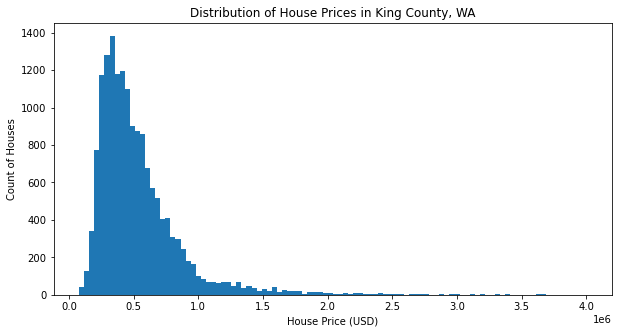

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("House Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices in King County, WA");

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

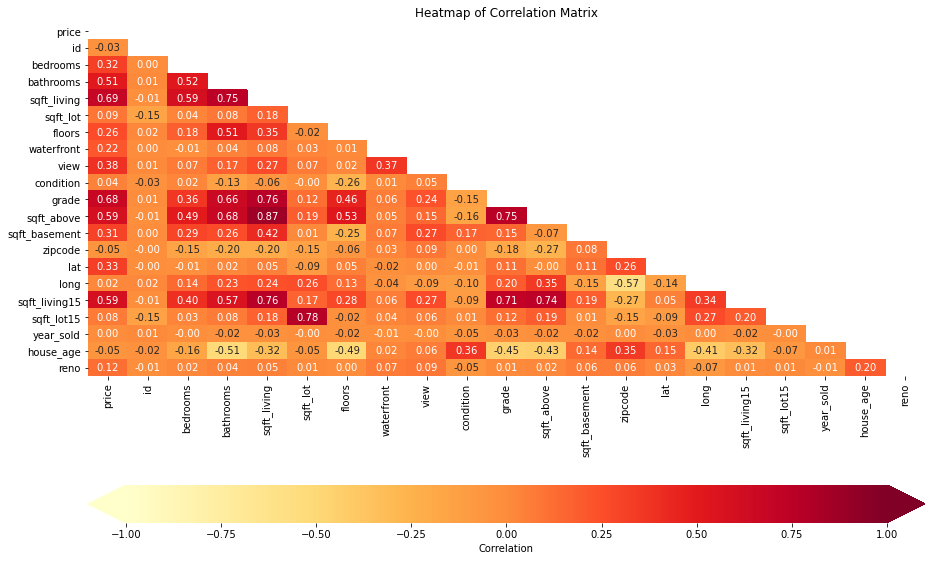

In [57]:
hm_df = pd.concat([y_train, X_train], axis=1)
corr = hm_df.corr()

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, cmap='YlOrRd', annot=True, center=0, fmt=".2f", vmin=-1, vmax=1, cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Matrix")

In [59]:
highest_corr = 'sqft_living'

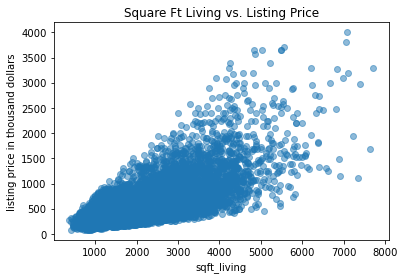

In [61]:
fig, ax = plt.subplots()

ax.scatter(X_train[highest_corr], y_train/1000, alpha=0.5)
ax.set_xlabel(highest_corr)
ax.set_ylabel("listing price in thousand dollars")
ax.set_title("Square Ft Living vs. Listing Price");

# Building a Baseline model

In [62]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [63]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_corr]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4809959417515867
Validation score: 0.4818294718684098


# Building a Model with Top 4 Correlations

In [64]:
X_train_second_model = X_train[['sqft_living' , 'grade', 'sqft_living15', 'sqft_above']]
X_train_second_model

,sqft_living,grade,sqft_living15,sqft_above
20696,3110,8,2610,3110
392,1600,8,1790,1600
6785,1550,8,1940,1280
4106,2560,8,2620,2560
2647,2850,9,2980,2850
...,...,...,...,...
4383,3370,9,2790,3370
11851,1910,8,1800,1910
14774,2690,9,2400,1720
9842,2280,8,2140,2280


In [78]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.542593800678061
Validation score: 0.548055438716218

Baseline Model
Train score:      0.4809959417515867
Validation score: 0.4818294718684098


# Building a Model with All Numeric Features

In [79]:
X_train_numeric = X_train.drop(['id', 'zipcode', 'year_sold'],axis=1)
X_train_numeric 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,reno
20696,4,2.75,3110,11225,2.0,0.0,0.0,3,8,3110,0,47.4865,-122.143,2610,8535,3,0
392,3,2.50,1600,26977,2.0,0.0,0.0,3,8,1600,0,47.7736,-121.901,1790,27743,9,0
6785,3,3.00,1550,1608,2.0,0.0,0.0,3,8,1280,270,47.6042,-122.303,1940,1883,13,0
4106,4,2.50,2560,5428,2.0,0.0,0.0,3,8,2560,0,47.3835,-122.095,2620,5428,3,0
2647,4,2.50,2850,37522,2.0,0.0,0.0,3,9,2850,0,47.5852,-121.992,2980,35280,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,4,3.50,3370,435600,2.0,0.0,3.0,3,9,3370,0,47.4398,-121.738,2790,114868,9,0
11851,3,2.50,1910,5600,2.0,0.0,0.0,3,8,1910,0,47.5752,-122.009,1800,4928,25,0
14774,4,3.25,2690,7200,2.0,0.0,3.0,3,9,1720,970,47.7341,-122.288,2400,8845,36,0
9842,4,2.50,2280,9725,2.0,0.0,0.0,3,8,2280,0,47.7568,-122.141,2140,8780,28,0


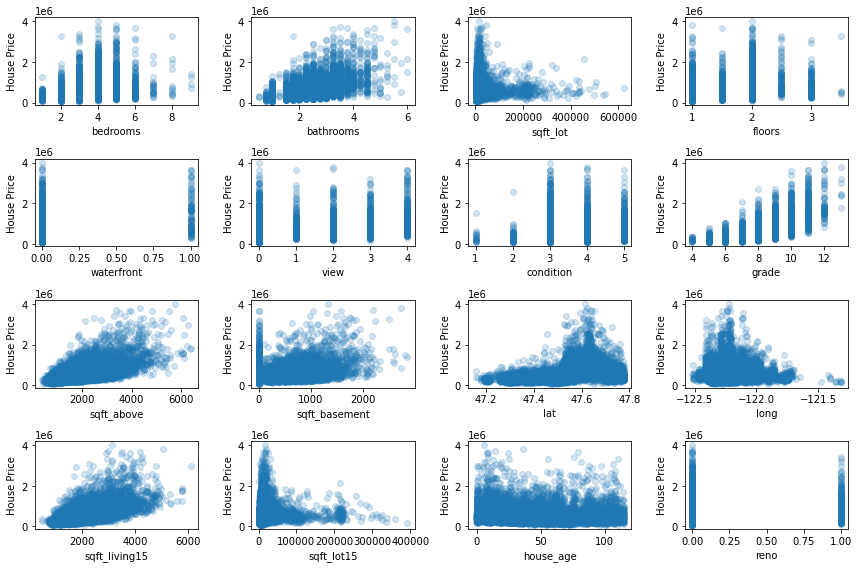

In [80]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("House Price")

In [81]:
allvar_model = LinearRegression()

allvar_model_scores = cross_validate(
    estimator=allvar_model,
    X=X_train_numeric,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", allvar_model_scores["train_score"].mean())
print("Validation score:", allvar_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6984914721941534
Validation score: 0.7035862016805584

Second Model
Train score:      0.542593800678061
Validation score: 0.548055438716218

Baseline Model
Train score:      0.4809959417515867
Validation score: 0.4818294718684098


### Investigating Multicollinearity

In [82]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_numeric)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2216.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:48:48   Log-Likelihood:            -2.1917e+05
No. Observations:               16162   AIC:                         4.384e+05
Df Residuals:                   16144   BIC:                         4.385e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.957e+07   1.66e+06    -23.885      0.000   -4.28e+07   -3.63e+07
bedrooms      -2.874e+04   2163.369    -13.286      0.000    -3.3e+04   -2.45e+04
bathrooms      3.761e+04   3549.341     10.596      0.000    3.07e+04    4.46e+04
sqft_living      90.9873     20.600      4.417      0.000      50.609     131.366
sqft_lot          0.1334      0.073      1.837      0.066      -0.009       0.276
floors         1.517e+04   3884.745      3.905      0.000    7556.492    2.28e+04
waterfront     4.915e+05   2.07e+04     23.697      0.000    4.51e+05    5.32e+05
view           5.042e+04   2314.449     21.786      0.000    4.59e+04     5.5e+04
condition      3.138e+04   2509.458     12.506      0.000    2.65e+04    3.63e+04
grade          1.029e+05   2338.635     43.995      0.000    9.83e+04    1.07e+05
sqft_above       59.4201     20.589      2.886      0.004      19.063      99.778
sqft_basement    41.3627     20.433      2.024      0.043       1.312      81.413
lat            5.553e+05   1.13e+04     49.006      0.000    5.33e+05    5.78e+05
long          -1.006e+05    1.3e+04     -7.764      0.000   -1.26e+05   -7.52e+04
sqft_living15    35.0947      3.774      9.298      0.000      27.696      42.493
sqft_lot15       -0.3729      0.098     -3.789      0.000      -0.566      -0.180
house_age      2493.1190     77.130     32.324      0.000    2341.935    2644.303
reno           5.627e+04   8677.404      6.485      0.000    3.93e+04    7.33e+04
==============================================================================
Omnibus:                     9552.795   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203259.285
Skew:                           2.435   Prob(JB):                         0.00
Kurtosis:                      19.677   Cond. No.                     4.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model based on House Features

In [83]:
housefeatures = [
    'bedrooms', 
    'bathrooms', 
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'condition', 
    'grade', 
    'sqft_above',
    'sqft_basement',
    'house_age',
    'reno'
] 

In [84]:
X_train_HF = X_train[housefeatures]
X_train_HF

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,house_age,reno
20696,4,2.75,3110,11225,2.0,3,8,3110,0,3,0
392,3,2.50,1600,26977,2.0,3,8,1600,0,9,0
6785,3,3.00,1550,1608,2.0,3,8,1280,270,13,0
4106,4,2.50,2560,5428,2.0,3,8,2560,0,3,0
2647,4,2.50,2850,37522,2.0,3,9,2850,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...
4383,4,3.50,3370,435600,2.0,3,9,3370,0,9,0
11851,3,2.50,1910,5600,2.0,3,8,1910,0,25,0
14774,4,3.25,2690,7200,2.0,3,9,1720,970,36,0
9842,4,2.50,2280,9725,2.0,3,8,2280,0,28,0


In [85]:
hf_model = LinearRegression()

hf_model_scores = cross_validate(
    estimator=hf_model,
    X=X_train_HF,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", hf_model_scores["train_score"].mean())
print("Validation score:", hf_model_scores["test_score"].mean())
print()
print("AllVar Model")
print("Train score:     ", allvar_model_scores["train_score"].mean())
print("Validation score:", allvar_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6248773979670028
Validation score: 0.6260298579601119

AllVar Model
Train score:      0.6984914721941534
Validation score: 0.7035862016805584

Baseline Model
Train score:      0.4809959417515867
Validation score: 0.4818294718684098


In [77]:
sm.OLS(y_train, sm.add_constant(X_train_HF)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2449.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:38:29   Log-Likelihood:            -2.2097e+05
No. Observations:               16162   AIC:                         4.420e+05
Df Residuals:                   16150   BIC:                         4.421e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.081e+06   1.95e+04    -55.505      0.000   -1.12e+06   -1.04e+06
bedrooms      -4.243e+04   2398.345    -17.693      0.000   -4.71e+04   -3.77e+04
bathrooms      3.968e+04   3961.962     10.014      0.000    3.19e+04    4.74e+04
sqft_living     133.6978     22.969      5.821      0.000      88.676     178.720
sqft_lot         -0.2719      0.052     -5.223      0.000      -0.374      -0.170
floors         3.855e+04   4210.554      9.156      0.000    3.03e+04    4.68e+04
condition      2.087e+04   2789.699      7.482      0.000    1.54e+04    2.63e+04
grade          1.375e+05   2432.372     56.519      0.000    1.33e+05    1.42e+05
sqft_above       23.2297     22.926      1.013      0.311     -21.707      68.166
sqft_basement    56.9198     22.829      2.493      0.013      12.172     101.668
house_age      3760.3926     78.262     48.049      0.000    3606.990    3913.796
reno           5.248e+04   9663.395      5.431      0.000    3.35e+04    7.14e+04
==============================================================================
Omnibus:                     8983.546   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164377.837
Skew:                           2.283   Prob(JB):                         0.00
Kurtosis:                      17.942   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
sm.OLS(y_train, sm.add_constant(X_train_HF.drop(['sqft_above','sqft_basement'], axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2980.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:50:03   Log-Likelihood:            -2.2100e+05
No. Observations:               16162   AIC:                         4.420e+05
Df Residuals:                   16152   BIC:                         4.421e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.072e+06   1.95e+04    -55.076      0.000   -1.11e+06   -1.03e+06
bedrooms    -4.288e+04   2401.005    -17.858      0.000   -4.76e+04   -3.82e+04
bathrooms    4.435e+04   3903.236     11.362      0.000    3.67e+04     5.2e+04
sqft_living   166.7461      3.781     44.098      0.000     159.334     174.158
sqft_lot       -0.3145      0.052     -6.079      0.000      -0.416      -0.213
floors       2.731e+04   3855.749      7.082      0.000    1.97e+04    3.49e+04
condition    2.191e+04   2788.448      7.856      0.000    1.64e+04    2.74e+04
grade        1.352e+05   2409.878     56.083      0.000     1.3e+05     1.4e+05
house_age    3826.8739     77.704     49.249      0.000    3674.565    3979.183
reno         5.292e+04   9677.216      5.469      0.000     3.4e+04    7.19e+04
==============================================================================
Omnibus:                     8961.168   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162929.171
Skew:                           2.277   Prob(JB):                         0.00
Kurtosis:                      17.873   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
X_train_HF_2 = X_train_HF.copy()
X_train_HF_2['ab_ratio'] = X_train_HF_2['sqft_above']/X_train_HF_2['sqft_living']

In [90]:
sm.OLS(y_train, sm.add_constant(X_train_HF_2.drop(['sqft_above','sqft_basement'], axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2682.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:53:46   Log-Likelihood:            -2.2100e+05
No. Observations:               16162   AIC:                         4.420e+05
Df Residuals:                   16151   BIC:                         4.421e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.068e+06   2.16e+04    -49.339      0.000   -1.11e+06   -1.03e+06
bedrooms    -4.288e+04   2401.079    -17.858      0.000   -4.76e+04   -3.82e+04
bathrooms    4.405e+04   3981.635     11.062      0.000    3.62e+04    5.18e+04
sqft_living   166.4536      3.857     43.161      0.000     158.894     174.013
sqft_lot       -0.3122      0.052     -5.991      0.000      -0.414      -0.210
floors       2.797e+04   4218.803      6.629      0.000    1.97e+04    3.62e+04
condition    2.185e+04   2792.075      7.827      0.000    1.64e+04    2.73e+04
grade        1.353e+05   2426.844     55.736      0.000    1.31e+05     1.4e+05
house_age    3823.2834     78.262     48.852      0.000    3669.881    3976.685
reno         5.294e+04   9677.581      5.470      0.000     3.4e+04    7.19e+04
ab_ratio    -4486.3617   1.16e+04     -0.386      0.700   -2.73e+04    1.83e+04
==============================================================================
Omnibus:                     8966.893   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163202.836
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      17.886   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
sm.OLS(y_train, sm.add_constant(X_train_HF_2.drop(['sqft_above','sqft_basement','sqft_lot', 'ab_ratio'], axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3340.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:56:14   Log-Likelihood:            -2.2102e+05
No. Observations:               16162   AIC:                         4.421e+05
Df Residuals:                   16153   BIC:                         4.421e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.081e+06   1.94e+04    -55.628      0.000   -1.12e+06   -1.04e+06
bedrooms    -4.165e+04   2395.182    -17.389      0.000   -4.63e+04    -3.7e+04
bathrooms    4.552e+04   3902.823     11.663      0.000    3.79e+04    5.32e+04
sqft_living   162.7575      3.728     43.658      0.000     155.450     170.065
floors       2.914e+04   3848.207      7.572      0.000    2.16e+04    3.67e+04
condition    2.179e+04   2791.481      7.805      0.000    1.63e+04    2.73e+04
grade        1.355e+05   2411.920     56.175      0.000    1.31e+05     1.4e+05
house_age    3853.4098     77.668     49.614      0.000    3701.172    4005.647
reno         5.188e+04   9686.444      5.355      0.000    3.29e+04    7.09e+04
==============================================================================
Omnibus:                     9007.524   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165751.842
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      18.006   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Selecting Features with sklearn

In [93]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

X_train_for_RFECV = StandardScaler().fit_transform(X_train_numeric)

model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

print("Was the column selected?")
for index, col in enumerate(X_train_numeric.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True
house_age: True
reno: True


In [96]:
X_train_chosen = X_train_numeric.drop(['sqft_lot', 'sqft_above', 'sqft_basement'], axis=1)
X_train_chosen 

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,lat,long,sqft_living15,sqft_lot15,house_age,reno
20696,4,2.75,3110,2.0,0.0,0.0,3,8,47.4865,-122.143,2610,8535,3,0
392,3,2.50,1600,2.0,0.0,0.0,3,8,47.7736,-121.901,1790,27743,9,0
6785,3,3.00,1550,2.0,0.0,0.0,3,8,47.6042,-122.303,1940,1883,13,0
4106,4,2.50,2560,2.0,0.0,0.0,3,8,47.3835,-122.095,2620,5428,3,0
2647,4,2.50,2850,2.0,0.0,0.0,3,9,47.5852,-121.992,2980,35280,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,4,3.50,3370,2.0,0.0,3.0,3,9,47.4398,-121.738,2790,114868,9,0
11851,3,2.50,1910,2.0,0.0,0.0,3,8,47.5752,-122.009,1800,4928,25,0
14774,4,3.25,2690,2.0,0.0,3.0,3,9,47.7341,-122.288,2400,8845,36,0
9842,4,2.50,2280,2.0,0.0,0.0,3,8,47.7568,-122.141,2140,8780,28,0


In [97]:
RFECV_chosen_model = LinearRegression()

RFECV_chosen_scores = cross_validate(
    estimator=RFECV_chosen_model,
    X=X_train_chosen,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", RFECV_chosen_scores["train_score"].mean())
print("Validation score:", RFECV_chosen_scores["test_score"].mean())
print()
print("AllVar Model")
print("Train score:     ", allvar_model_scores["train_score"].mean())
print("Validation score:", allvar_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6980413628823238
Validation score: 0.7032796156119877

AllVar Model
Train score:      0.6984914721941534
Validation score: 0.7035862016805584

Baseline Model
Train score:      0.4809959417515867
Validation score: 0.4818294718684098


In [99]:
sm.OLS(y_train, sm.add_constant(X_train_chosen)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2686.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:12:42   Log-Likelihood:            -2.1919e+05
No. Observations:               16162   AIC:                         4.384e+05
Df Residuals:                   16147   BIC:                         4.385e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.772e+07    1.6e+06    -23.523      0.000   -4.09e+07   -3.46e+07
bedrooms      -2.889e+04   2163.689    -13.351      0.000   -3.31e+04   -2.46e+04
bathrooms      3.544e+04   3509.034     10.099      0.000    2.86e+04    4.23e+04
sqft_living     143.9556      3.741     38.485      0.000     136.624     151.287
floors         2.187e+04   3477.138      6.288      0.000    1.51e+04    2.87e+04
waterfront     4.943e+05   2.07e+04     23.832      0.000    4.54e+05    5.35e+05
view           4.898e+04   2279.556     21.485      0.000    4.45e+04    5.34e+04
condition      3.047e+04   2503.227     12.173      0.000    2.56e+04    3.54e+04
grade          1.044e+05   2313.594     45.107      0.000    9.98e+04    1.09e+05
lat            5.487e+05   1.12e+04     48.850      0.000    5.27e+05    5.71e+05
long          -8.804e+04   1.27e+04     -6.959      0.000   -1.13e+05   -6.32e+04
sqft_living15    37.1075      3.721      9.974      0.000      29.815      44.400
sqft_lot15       -0.2248      0.065     -3.474      0.001      -0.352      -0.098
house_age      2503.8408     77.100     32.475      0.000    2352.717    2654.965
reno           5.603e+04   8682.513      6.453      0.000     3.9e+04     7.3e+04
==============================================================================
Omnibus:                     9581.375   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205032.970
Skew:                           2.443   Prob(JB):                         0.00
Kurtosis:                      19.751   Cond. No.                     2.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We choose RFECV as our final basic model but drop lat and long**

In [104]:
X_train_chosen.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'reno'],
      dtype='object')

In [110]:
best_feathers = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_living15', 'sqft_lot15',
       'house_age', 'reno']

In [111]:
X_train_final = X_train[best_feathers]
X_test_final = X_test[best_feathers]

In [112]:
final_model = LinearRegression()

final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

0.6569464814583386

**RMSE Computing**

In [113]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

208295.31552245645

**Investigating Linearity**

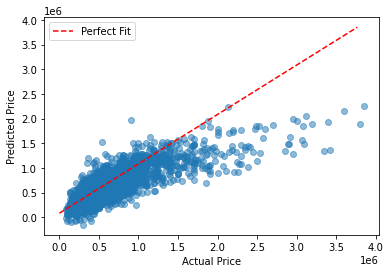

In [114]:
pred = preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

**Investigating Normality**

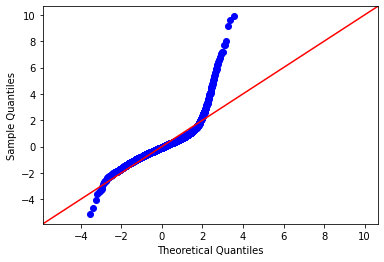

In [115]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

**Investigating Multicollinearity (Independence Assumption)**

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms         23.314631
bathrooms        28.127970
sqft_living      25.865999
floors           13.482933
waterfront        1.168860
view              1.417614
condition        28.152211
grade            69.374078
sqft_living15    26.270639
sqft_lot15        1.341660
house_age         5.542721
reno              1.143587
Name: Variance Inflation Factor, dtype: float64

**Investigating Homoscedasticity**

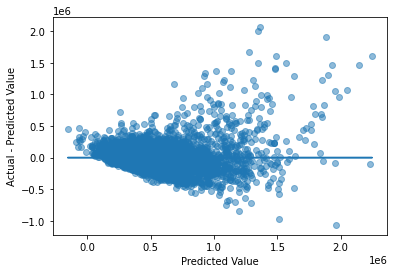

In [118]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Summary

The final model doesn't pass the assumptions of linear regression.

In [162]:
df_1 = df.copy()
round(df_1.bedrooms.mean()), round(df_1.bathrooms.mean())

(3.0, 2.0)

In [163]:
df_1['bed_cat'] = np.where(df_1.bedrooms>3, ">3 bedrooms", df_1.bedrooms.astype(str) + 'bed')
df_1['bath_cat'] = np.where(df_1.bathrooms>2, ">2 bathrooms", df_1.bathrooms.astype(str) + 'bath')

In [164]:
df_1.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,bed_cat,bath_cat
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0,3bed,1.0bath
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1,3bed,>2 bathrooms
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0,2bed,1.0bath
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0,>3 bedrooms,>2 bathrooms
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0,3bed,2.0bath
5,7237550310,1230000,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,2014,13,0,>3 bedrooms,>2 bathrooms
6,1321400060,257500,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,2014,19,0,3bed,>2 bathrooms
7,2008000270,291850,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0,98198,47.4095,-122.315,1650,9711,2015,52,0,3bed,1.5bath
8,2414600126,229500,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730,98146,47.5123,-122.337,1780,8113,2015,55,0,3bed,1.0bath
9,3793500160,323000,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0,98038,47.3684,-122.031,2390,7570,2015,12,0,3bed,>2 bathrooms


In [165]:
df_1['bed_cat'].value_counts()

3bed           9820
>3 bedrooms    8777
2bed           2757
1bed            196
Name: bed_cat, dtype: int64

In [166]:
df_1['bath_cat'].value_counts()

>2 bathrooms    11198
1.0bath          3849
1.75bath         3046
2.0bath          1928
1.5bath          1445
0.75bath           71
1.25bath            9
0.5bath             4
Name: bath_cat, dtype: int64

In [167]:
df_1['have_basement'] = np.where(df_1.sqft_basement == 0, 0, 1)

In [168]:
df_1['have_basement'].value_counts()

0    13259
1     8291
Name: have_basement, dtype: int64

# House Features Model

In [169]:
from sklearn.preprocessing import OneHotEncoder
cat_bed = df_1[['bed_cat']]

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

ohe.fit(cat_bed)
ohe.categories_

[array(['1bed', '2bed', '3bed', '>3 bedrooms'], dtype=object)]

In [170]:
cat_bed_encoded = ohe.transform(cat_bed).astype('int')
cat_bed_encoded = pd.DataFrame(cat_bed_encoded, columns = ohe.categories_[0], index=df_1.index)
cat_bed_encoded

,1bed,2bed,3bed,>3 bedrooms
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
21592,0,0,1,0
21593,0,0,0,1
21594,0,1,0,0
21595,0,0,1,0


In [171]:
df_1.drop('bedrooms', axis=1, inplace=True)
df_1 = pd.concat([df_1, cat_bed_encoded.drop('1bed', axis=1)], axis=1)

In [172]:
df_1

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,bed_cat,bath_cat,have_basement,2bed,3bed,>3 bedrooms
0,7129300520,221900,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0,3bed,1.0bath,0,0,1,0
1,6414100192,538000,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1,3bed,>2 bathrooms,1,0,1,0
2,5631500400,180000,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0,2bed,1.0bath,0,1,0,0
3,2487200875,604000,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0,>3 bedrooms,>2 bathrooms,1,0,0,1
4,1954400510,510000,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0,3bed,2.0bath,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,2014,5,0,3bed,>2 bathrooms,0,0,1,0
21593,6600060120,400000,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2015,1,0,>3 bedrooms,>2 bathrooms,0,0,0,1
21594,1523300141,402101,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,2014,5,0,2bed,0.75bath,0,1,0,0
21595,291310100,400000,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2015,11,0,3bed,>2 bathrooms,0,0,1,0


In [176]:
cat_bath = df_1[['bath_cat']]

ohe1 = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

ohe1.fit(cat_bath)
ohe1.categories_

[array(['0.5bath', '0.75bath', '1.0bath', '1.25bath', '1.5bath',
        '1.75bath', '2.0bath', '>2 bathrooms'], dtype=object)]

In [178]:
cat_bath_encoded = ohe1.transform(cat_bath).astype('int')
cat_bath_encoded = pd.DataFrame(cat_bath_encoded, columns = ohe1.categories_[0], index=df_1.index)
cat_bath_encoded

,0.5bath,0.75bath,1.0bath,1.25bath,1.5bath,1.75bath,2.0bath,>2 bathrooms
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,1
21593,0,0,0,0,0,0,0,1
21594,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,1


In [179]:
df_1.drop('bathrooms', axis=1, inplace=True)
df_1 = pd.concat([df_1, cat_bath_encoded.drop('0.5bath', axis=1)], axis=1)

In [180]:
df_1

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,bed_cat,bath_cat,have_basement,2bed,3bed,>3 bedrooms,0.75bath,1.0bath,1.25bath,1.5bath,1.75bath,2.0bath,>2 bathrooms
0,7129300520,221900,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0,3bed,1.0bath,0,0,1,0,0,1,0,0,0,0,0
1,6414100192,538000,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1,3bed,>2 bathrooms,1,0,1,0,0,0,0,0,0,0,1
2,5631500400,180000,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0,2bed,1.0bath,0,1,0,0,0,1,0,0,0,0,0
3,2487200875,604000,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0,>3 bedrooms,>2 bathrooms,1,0,0,1,0,0,0,0,0,0,1
4,1954400510,510000,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0,3bed,2.0bath,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,1530,1131,3.0,0.0,0.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,2014,5,0,3bed,>2 bathrooms,0,0,1,0,0,0,0,0,0,0,1
21593,6600060120,400000,2310,5813,2.0,0.0,0.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2015,1,0,>3 bedrooms,>2 bathrooms,0,0,0,1,0,0,0,0,0,0,1
21594,1523300141,402101,1020,1350,2.0,0.0,0.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,2014,5,0,2bed,0.75bath,0,1,0,0,1,0,0,0,0,0,0
21595,291310100,400000,1600,2388,2.0,0.0,0.0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2015,11,0,3bed,>2 bathrooms,0,0,1,0,0,0,0,0,0,0,1


# LR on house features

In [181]:
home_features = ['sqft_living',
                 'sqft_lot',
                 'floors',
                 'condition',
                 'grade',
                 'house_age',
                 'reno',
                 'have_basement',
                 '2bed',
                 '3bed',
                 '>3 bedrooms',
                 '0.75bath',
                 '1.0bath',
                 '1.25bath',
                 '1.5bath',
                 '1.75bath',
                 '2.0bath',
                 '>2 bathrooms'
]

In [183]:
df_1
y = df_1['price']
X = df_1.drop('price', axis=1)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [185]:
X_train_hf_model = X_train[home_features]
X_train_hf_model

,sqft_living,sqft_lot,floors,condition,grade,house_age,reno,have_basement,2bed,3bed,>3 bedrooms,0.75bath,1.0bath,1.25bath,1.5bath,1.75bath,2.0bath,>2 bathrooms
20696,3110,11225,2.0,3,8,3,0,0,0,0,1,0,0,0,0,0,0,1
392,1600,26977,2.0,3,8,9,0,0,0,1,0,0,0,0,0,0,0,1
6785,1550,1608,2.0,3,8,13,0,1,0,1,0,0,0,0,0,0,0,1
4106,2560,5428,2.0,3,8,3,0,0,0,0,1,0,0,0,0,0,0,1
2647,2850,37522,2.0,3,9,27,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,3370,435600,2.0,3,9,9,0,0,0,0,1,0,0,0,0,0,0,1
11851,1910,5600,2.0,3,8,25,0,0,0,1,0,0,0,0,0,0,0,1
14774,2690,7200,2.0,3,9,36,0,1,0,0,1,0,0,0,0,0,0,1
9842,2280,9725,2.0,3,8,28,0,0,0,0,1,0,0,0,0,0,0,1


In [186]:
hf_cat_model = LinearRegression()

hf_cat_model_scores = cross_validate(
    estimator=hf_cat_model,
    X=X_train_hf_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Home Features Model")
print("Train score:     ", hf_cat_model_scores["train_score"].mean())
print("Validation score:", hf_cat_model_scores["test_score"].mean())

Home Features Model
Train score:      0.6267390305572724
Validation score: 0.629534527996971


In [187]:
sm.OLS(y_train, sm.add_constant(X_train_hf_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1511.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:00:36   Log-Likelihood:            -2.2092e+05
No. Observations:               16162   AIC:                         4.419e+05
Df Residuals:                   16143   BIC:                         4.420e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.252e+06   1.23e+05    -10.202      0.000   -1.49e+06   -1.01e+06
sqft_living     181.6508      3.523     51.559      0.000     174.745     188.557
sqft_lot         -0.2985      0.052     -5.764      0.000      -0.400      -0.197
floors         5.371e+04   4147.551     12.949      0.000    4.56e+04    6.18e+04
condition      2.881e+04   2804.826     10.270      0.000    2.33e+04    3.43e+04
grade          1.412e+05   2393.986     58.986      0.000    1.37e+05    1.46e+05
house_age      3121.2498     80.951     38.557      0.000    2962.576    3279.923
reno            7.37e+04   9631.772      7.652      0.000    5.48e+04    9.26e+04
have_basement   3.89e+04   3871.539     10.049      0.000    3.13e+04    4.65e+04
2bed          -4.517e+04   1.91e+04     -2.359      0.018   -8.27e+04   -7634.548
3bed          -1.055e+05    1.9e+04     -5.546      0.000   -1.43e+05   -6.82e+04
>3 bedrooms   -1.481e+05   1.94e+04     -7.647      0.000   -1.86e+05    -1.1e+05
0.75bath       2.509e+05   1.24e+05      2.017      0.044    7063.053    4.95e+05
1.0bath        1.571e+05   1.21e+05      1.298      0.194   -8.01e+04    3.94e+05
1.25bath       2.189e+05   1.48e+05      1.479      0.139   -7.11e+04    5.09e+05
1.5bath        1.218e+05   1.21e+05      1.006      0.315   -1.16e+05    3.59e+05
1.75bath       1.181e+05   1.21e+05      0.976      0.329   -1.19e+05    3.55e+05
2.0bath          1.2e+05   1.21e+05      0.991      0.322   -1.17e+05    3.57e+05
>2 bathrooms   1.027e+05   1.21e+05      0.848      0.396   -1.35e+05     3.4e+05
==============================================================================
Omnibus:                     8805.167   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158027.824
Skew:                           2.226   Prob(JB):                         0.00
Kurtosis:                      17.657   Cond. No.                     7.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
sm.OLS(y_train, sm.add_constant(X_train_hf_model.drop(['0.75bath',
                 '1.0bath',
                 '1.25bath',
                 '1.5bath',
                 '1.75bath',
                 '2.0bath',
                 '>2 bathrooms'], axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2455.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:05:02   Log-Likelihood:            -2.2096e+05
No. Observations:               16162   AIC:                         4.419e+05
Df Residuals:                   16150   BIC:                         4.420e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.074e+06    2.5e+04    -42.878      0.000   -1.12e+06   -1.02e+06
sqft_living     177.4716      3.440     51.585      0.000     170.728     184.215
sqft_lot         -0.2933      0.052     -5.653      0.000      -0.395      -0.192
floors         4.577e+04   3898.339     11.742      0.000    3.81e+04    5.34e+04
condition       2.61e+04   2783.961      9.375      0.000    2.06e+04    3.16e+04
grade          1.396e+05   2388.563     58.438      0.000    1.35e+05    1.44e+05
house_age      3363.6879     74.067     45.414      0.000    3218.508    3508.868
reno           6.662e+04   9592.618      6.945      0.000    4.78e+04    8.54e+04
have_basement  3.121e+04   3756.073      8.310      0.000    2.39e+04    3.86e+04
2bed          -5.918e+04   1.88e+04     -3.145      0.002   -9.61e+04   -2.23e+04
3bed          -1.312e+05   1.86e+04     -7.068      0.000   -1.68e+05   -9.48e+04
>3 bedrooms   -1.768e+05   1.89e+04     -9.366      0.000   -2.14e+05    -1.4e+05
==============================================================================
Omnibus:                     8938.196   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164290.662
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      17.948   Cond. No.                     8.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model with Zipcodes

In [242]:
df_2 = df.copy()

In [243]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21550 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21550 non-null  int64  
 1   price          21550 non-null  int64  
 2   bedrooms       21550 non-null  int64  
 3   bathrooms      21550 non-null  float64
 4   sqft_living    21550 non-null  int64  
 5   sqft_lot       21550 non-null  int64  
 6   floors         21550 non-null  float64
 7   waterfront     21550 non-null  float64
 8   view           21550 non-null  float64
 9   condition      21550 non-null  int64  
 10  grade          21550 non-null  int64  
 11  sqft_above     21550 non-null  int64  
 12  sqft_basement  21550 non-null  int64  
 13  zipcode        21550 non-null  object 
 14  lat            21550 non-null  float64
 15  long           21550 non-null  float64
 16  sqft_living15  21550 non-null  int64  
 17  sqft_lot15     21550 non-null  int64  
 18  year_s

In [244]:
df_2['have_basement'] = np.where(df_2.sqft_basement == 0, 0, 1)

In [245]:
df_2['zipcode'].apply(str)

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21550, dtype: object

In [246]:
cat_zip = df_2[['zipcode']]

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

ohe.fit(cat_zip)

ohe.categories_

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98052', '98053', '98055', '98056', '98058', '98059', '98065',
        '98070', '98072', '98074', '98075', '98077', '98092', '98102',
        '98103', '98105', '98106', '98107', '98108', '98109', '98112',
        '98115', '98116', '98117', '98118', '98119', '98122', '98125',
        '98126', '98133', '98136', '98144', '98146', '98148', '98155',
        '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
       dtype=object)]

In [247]:
cat_zip_encoded = ohe.transform(cat_zip)

cat_zip_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [248]:
cat_zip_encoded = pd.DataFrame(cat_zip_encoded, columns = ohe.categories_[0], index=df_2.index)
cat_zip_encoded

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
df_2 = pd.concat([df_2.drop('zipcode', axis=1), cat_zip_encoded], axis=1)

In [250]:
df_2.drop('98001', axis=1,inplace=True)

In [251]:
df_2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,have_basement,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,47.5112,-122.257,1340,5650,2014,59,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,47.7210,-122.319,1690,7639,2014,63,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,47.7379,-122.233,2720,8062,2015,82,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,47.5208,-122.393,1360,5000,2014,49,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,47.6168,-122.045,1800,7503,2015,28,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,47.6993,-122.346,1530,1509,2014,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,47.5107,-122.362,1830,7200,2015,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,47.5944,-122.299,1020,2007,2014,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,400000,3

In [252]:
df_2
y = df_2['price']
X = df_2.drop('price', axis=1)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [254]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,have_basement,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
20696,847100046,4,2.75,3110,11225,2.0,0.0,0.0,3,8,3110,0,47.4865,-122.143,2610,8535,2015,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,4047200695,3,2.50,1600,26977,2.0,0.0,0.0,3,8,1600,0,47.7736,-121.901,1790,27743,2014,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6785,9826701794,3,3.00,1550,1608,2.0,0.0,0.0,3,8,1280,270,47.6042,-122.303,1940,1883,2014,13,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4106,7140700850,4,2.50,2560,5428,2.0,0.0,0.0,3,8,2560,0,47.3835,-122.095,2620,5428,2015,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,3276930370,4,2.50,2850,37522,2.0,0.0,0.0,3,9,2850,0,47.5852,-121.992,2980,35280,2014,27,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,3523089019,4,3.50,3370,435600,2.0,0.0,3.0,3,9,3370,0,47.4398,-121.738,2790,114868,2014,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11851,3904980320,3,2.50,1910,5600,2.0,0.0,0.0,3,8,1910,0,47.5752,-122.009,1800,4928,2014,25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14774,7663700150,4,3.25,2690,7200,2.0,0.0,3.0,3,9,1720,970,47.7341,-122.288,2400,8845,2014,36,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9842,9560800310,4,2.50,2280,9725,2.0,0.0,0.0,3,8,2280,0,47.7568,-12

In [256]:
X_train_all_model = X_train.drop(['id', 'lat','long','year_sold'], axis=1)
X_train_all_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,reno,have_basement,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
20696,4,2.75,3110,11225,2.0,0.0,0.0,3,8,3110,0,2610,8535,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,3,2.50,1600,26977,2.0,0.0,0.0,3,8,1600,0,1790,27743,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6785,3,3.00,1550,1608,2.0,0.0,0.0,3,8,1280,270,1940,1883,13,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4106,4,2.50,2560,5428,2.0,0.0,0.0,3,8,2560,0,2620,5428,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,4,2.50,2850,37522,2.0,0.0,0.0,3,9,2850,0,2980,35280,27,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,4,3.50,3370,435600,2.0,0.0,3.0,3,9,3370,0,2790,114868,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11851,3,2.50,1910,5600,2.0,0.0,0.0,3,8,1910,0,1800,4928,25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14774,4,3.25,2690,7200,2.0,0.0,3.0,3,9,1720,970,2400,8845,36,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9842,4,2.50,2280,9725,2.0,0.0,0.0,3,8,2280,0,2140,8780,28,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
all_model = LinearRegression()

all_model_scores = cross_validate(
    estimator=all_model,
    X=X_train_all_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("All Model")
print("Train score:     ", all_model_scores["train_score"].mean())
print("Validation score:", all_model_scores["test_score"].mean())

All Model
Train score:      0.8219513268700117
Validation score: 0.820536184059097


In [278]:
coef = all_model.fit(X_train_all_model, y_train).coef_
coef 

array([-2.11016179e+04,  2.31838787e+04,  7.63443406e+01,  3.54506862e-01,
       -3.28166337e+04,  5.52705419e+05,  5.80722390e+04,  2.45024242e+04,
        6.29050706e+04,  1.00516188e+02,  5.45394695e+01,  1.91651585e+01,
       -2.01369161e-01,  7.68062583e+02,  3.92355962e+04, -2.09023101e+04,
        3.03477588e+04, -1.16720949e+04,  7.52900034e+05,  3.15261376e+05,
        2.60045059e+05,  2.44102579e+05,  2.52921480e+05,  8.76286758e+04,
        1.24278704e+05,  1.13474149e+05,  9.27105756e+04, -2.19067240e+04,
       -3.12866589e+04,  1.69704960e+05,  1.75623015e+05,  1.26171435e+05,
        2.07380406e+05,  1.08156227e+04,  1.37166676e+04,  1.10050555e+04,
        3.62204587e+05,  1.99644410e+05,  3.67927985e+04,  1.20676432e+06,
        5.16523120e+05,  5.15770163e+03,  9.77619864e+04,  2.28551389e+05,
        2.06076769e+05,  4.48392802e+04,  1.01560696e+05,  3.13745396e+04,
        9.03383572e+04,  8.44943439e+04,  1.15414731e+04,  1.53341629e+05,
        1.77529485e+05,  

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [259]:
sm.OLS(y_train, sm.add_constant(X_train_all_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     874.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:14:47   Log-Likelihood:            -2.1495e+05
No. Observations:               16162   AIC:                         4.301e+05
Df Residuals:                   16076   BIC:                         4.307e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.844e+05   1.72e+04    -34.046      0.000   -6.18e+05   -5.51e+05
bedrooms       -2.11e+04   1697.572    -12.430      0.000   -2.44e+04   -1.78e+04
bathrooms      2.318e+04   2787.321      8.318      0.000    1.77e+04    2.86e+04
sqft_living      76.3443     15.977      4.778      0.000      45.027     107.662
sqft_lot          0.3545      0.056      6.290      0.000       0.244       0.465
floors        -3.282e+04   3329.806     -9.855      0.000   -3.93e+04   -2.63e+04
waterfront     5.527e+05   1.63e+04     33.835      0.000    5.21e+05    5.85e+05
view           5.807e+04   1844.291     31.488      0.000    5.45e+04    6.17e+04
condition       2.45e+04   2000.564     12.248      0.000    2.06e+04    2.84e+04
grade          6.291e+04   1916.011     32.831      0.000    5.91e+04    6.67e+04
sqft_above      100.5162     15.983      6.289      0.000      69.188     131.844
sqft_basement    54.5395     16.498      3.306      0.001      22.202      86.877
sqft_living15    19.1652      3.071      6.241      0.000      13.146      25.184
sqft_lot15       -0.2014      0.078     -2.581      0.010      -0.354      -0.048
house_age       768.0626     67.326     11.408      0.000     636.096     900.029
reno           3.924e+04   6758.025      5.806      0.000     2.6e+04    5.25e+04
have_basement  -2.09e+04   4515.231     -4.629      0.000   -2.98e+04   -1.21e+04
98002          3.035e+04    1.5e+04      2.027      0.043     999.307    5.97e+04
98003         -1.167e+04   1.33e+04     -0.874      0.382   -3.78e+04    1.45e+04
98004          7.529e+05   1.31e+04     57.403      0.000    7.27e+05    7.79e+05
98005          3.153e+05   1.57e+04     20.101      0.000    2.85e+05    3.46e+05
98006            2.6e+05    1.2e+04     21.703      0.000    2.37e+05    2.84e+05
98007          2.441e+05   1.64e+04     14.840      0.000    2.12e+05    2.76e+05
98008          2.529e+05   1.33e+04     19.082      0.000    2.27e+05    2.79e+05
98010          8.763e+04   1.93e+04      4.537      0.000    4.98e+04    1.25e+05
98011          1.243e+05   1.51e+04      8.206      0.000    9.46e+04    1.54e+05
98014          1.135e+05    1.8e+04      6.300      0.000    7.82e+04    1.49e+05
98019          9.271e+04   1.51e+04      6.157      0.000    6.32e+04    1.22e+05
98022         -2.191e+04   1.46e+04     -1.501      0.133   -5.05e+04    6694.386
98023         -3.129e+04   1.18e+04     -2.660      0.008   -5.43e+04   -8229.721
98024          1.697e+05   2.13e+04      7.961      0.000    1.28e+05    2.11e+05
98027          1.756e+05   1.21e+04     14.463      0.000    1.52e+05    1.99e+05
98028          1.262e+05   1.34e+04      9.384      0.000    9.98e+04    1.53e+05
98029          2.074e+05    1.3e+04     15.992      0.000    1.82e+05    2.33e+05
98030          1.082e+04   1.37e+04      0.792   

Come on!!